In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rfest.splines import build_spline_matrix

In [106]:
from rfest.simulate import mexicanhat1d, mexicanhat2d, flickerfield, noise2d, get_response

In [26]:
from rfest import splineLG

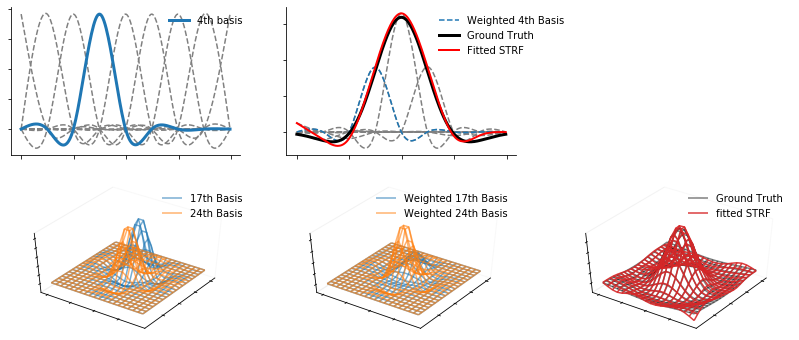

In [339]:
from mpl_toolkits.mplot3d import Axes3D

dims = [200, ]
df= [9,] 
smooth = 'cr'
S = build_spline_matrix(dims, df, smooth)
w = mexicanhat1d(dims=dims[0], std=35)
X = flickerfield(n_samples=3000,dims=dims[0], design_matrix=True)
y = get_response(X, w)

fig = plt.figure(figsize=(14, 6))
ax_1d_left = fig.add_subplot(2, 3, 1)
x = np.arange(200)
ax_1d_left.plot(x, S, color='grey', linestyle='--')
ax_1d_left.plot(x, S[:, 3], color='C0', linestyle='-', linewidth=3, label='4th basis')
ax_1d_left.legend(frameon=False, loc=1, bbox_to_anchor=(1.05, 1))

spl = splineLG(X, y, dims=dims, df=df)
ax_1d_right = fig.add_subplot(2, 3, 2)
ax_1d_right.plot(x, S * spl.b_spl, color='grey', linestyle='--')
ax_1d_right.plot(x, S[:, 3] * spl.b_spl[3], color='C0', linestyle='--', label='Weighted 4th Basis')
ax_1d_right.plot(x, w, color='black', linewidth=3, label='Ground Truth')
ax_1d_right.plot(x, spl.w_spl, color='red', linewidth=2, label='Fitted STRF')
ax_1d_right.legend(frameon=False, loc=1, bbox_to_anchor=(1.25, 1))

for ax in [ax_1d_left, ax_1d_right]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
#     ax.set_xlabel('x', fontsize=16)
#     ax.set_ylabel('z', fontsize=16)
    
ax_2d_left = fig.add_subplot(2, 3, 4, projection='3d')
ax_2d_mid = fig.add_subplot(2, 3, 5, projection='3d')
ax_2d_right = fig.add_subplot(2, 3, 6, projection='3d')



dims = [20, 20]
df= [7,7] 
smooth = 'cr'
S = build_spline_matrix(dims, df, smooth)

w = mexicanhat2d(dims=dims, std=[5,5])
X = noise2d(n_samples=3000,dims=dims, design_matrix=False)
y = get_response(X.reshape(3000, 400), w.flatten())

spl = splineLG(X.reshape(3000, 400), y, dims=dims, df=df)

X = np.arange(0, 20, 1)
Y = np.arange(0, 20, 1)
X, Y = np.meshgrid(X, Y)

# for i in range(0, 49):
#     ax_2d_left.plot_wireframe(X, Y, S[:, i].reshape(dims), alpha=0.1, color='grey')

# for i in range(0, 49):
ax_2d_left.plot_wireframe(X, Y, S[:, 17].reshape(dims), alpha=0.6, color='C0', label='17th Basis')
ax_2d_left.plot_wireframe(X, Y, S[:, 24].reshape(dims), alpha=0.6, color='C1', label='24th Basis')
# ax_2d_left.plot_wireframe(X, Y, S[:, 31].reshape(dims), alpha=0.6, color='C2', label='31th Basis')
ax_2d_left.legend(frameon=False, loc=1, bbox_to_anchor=(1.05, 1))

ax_2d_mid.plot_wireframe(X, Y, S[:, 17].reshape(dims)*spl.b_spl[17], alpha=0.6, color='C0', label='Weighted 17th Basis')
ax_2d_mid.plot_wireframe(X, Y, S[:, 24].reshape(dims)*spl.b_spl[24], alpha=0.6, color='C1', label='Weighted 24th Basis')
# ax_2d_mid.plot_wireframe(X, Y, S[:, 31].reshape(dims)*spl.b_spl[31], alpha=0.6, color='C2', label='weighted 31th Basis')
ax_2d_mid.legend(frameon=False, loc=1)

ax_2d_right.plot_wireframe(X, Y, w.reshape(dims), alpha=0.5, color='black', label='Ground Truth')
ax_2d_right.plot_wireframe(X, Y, spl.w_spl.reshape(dims), alpha=0.9, color='C3', label='fitted STRF')


ax_2d_right.legend(frameon=False,)

ax_2d_left.view_init(45, 35)
ax_2d_mid.view_init(45, 35)
ax_2d_right.view_init(45, 35)

for ax in [ax_2d_left, ax_2d_mid, ax_2d_right]:

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
#     ax.set_xlabel('x', fontsize=16)
#     ax.set_ylabel('y', fontsize=16)
#     ax.set_zlabel('z', fontsize=16)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)

fig.savefig('./figs/fig6.pdf')